In [10]:
!pip install diffusers
!pip install pillow

In [2]:
from transformers import pipeline
import numpy as np
from diffusers import DiffusionPipeline

In [3]:
prompt_writer = pipeline('text-generation', model='toloka/gpt2-large-rl-prompt-writing')
prompt_reward_model = pipeline('text-classification', model='toloka/prompts_reward_model')
pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.15G [00:00<?, ?B/s]

Some weights of the model checkpoint at toloka/gpt2-large-rl-prompt-writing were not used when initializing GPT2LMHeadModel: ['v_head.2.weight', 'v_head.0.weight', 'v_head.0.bias', 'v_head.2.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/38.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/386 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [13]:
def write_prompt(img_desc):
        prompts = [p['generated_text'] for p in prompt_writer(img_desc + '</s>', max_new_tokens=100, num_return_sequences=2)]
        scores = [p['score'] for p in prompt_reward_model(prompts, function_to_apply='none')]
        return prompts[np.argmax(scores)].split('</s>')[1].strip()


def generate(text):
    print("user keywords: ", text)
    prompt = write_prompt(text)
    print("Generated prompt: ", prompt)
    img = pipe(prompt=prompt, num_inference_steps=50).images[0]
    return img, prompt

In [16]:
user_keywords = "lady cyberpunk blue hair anime"

In [15]:
image = generate(user_keywords)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated prompt:  beauty, lady, blue eyes, cyber, anime, highly detailed, concept art, unreal engine 5 rendered, 8k, art by artgerm and greg rutkowski and alena aenami, cinematic lightning, fantasy epic composition unreal engine steps


  0%|          | 0/50 [00:00<?, ?it/s]

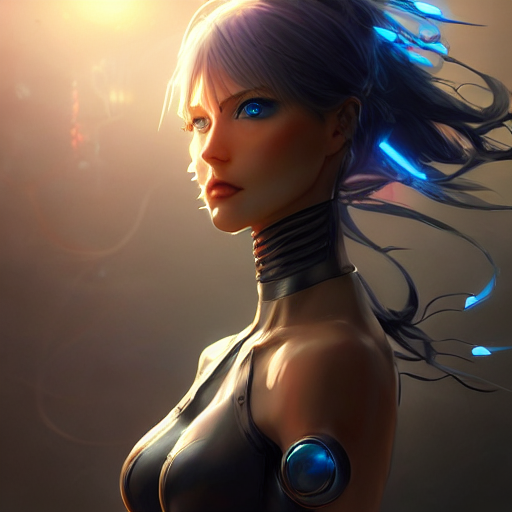

In [18]:
from IPython.display import Image

display(image[0])